# Notebook Student Performance 02

## EDA

In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import sklearn
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn import linear_model

In [2]:
#import data

data = pd.read_csv('./data/student/student-mat.csv', sep=';')


In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
dataColumnsValues = data.columns.values; dataColumnsValues

array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'], dtype=object)

In [7]:
#label
label = 'G3'

In [8]:
#Selectiong columns dtype int64

dataColumns_int64 = data.select_dtypes(include='int64'); dataColumns_int64


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


In [9]:
#selection names of columns with dtype int64

namesColInt64 = dataColumns_int64.columns.values; namesColInt64

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'], dtype=object)

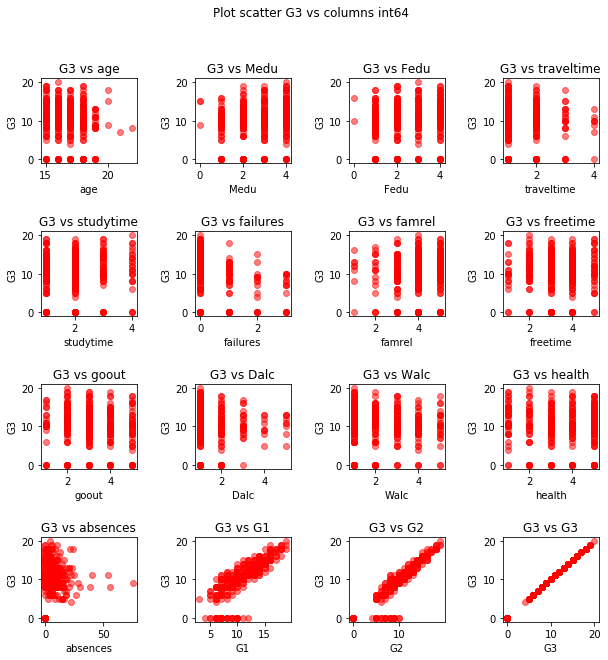

In [10]:
#Plotagens scatter column G3 vs columns dtype int64 

numPlots = len(dataColumns_int64.columns) # num columns dtype int64

fig, ax = plt.subplots(round(numPlots/4),round(numPlots/4), figsize=(10,10)) # subplots(4,4) # Alterando os valores em figsize é possível melhorar os detalhes das plotagens.
fig.subplots_adjust(wspace=0.6, hspace=0.8) # space with and height of plots
fig.suptitle('Plot scatter G3 vs columns int64')

n = 0 # control, contador index column 
for i in range(round(numPlots/4)):
    for j in range(round(numPlots/4)):
        col = namesColInt64[n]; n += 1
        ax[i][j].scatter(dataColumns_int64[col],dataColumns_int64[label], color='r', alpha=0.5) #label = G3
        ax[i][j].set_title(label + ' vs '+ col)
        ax[i][j].set_xlabel(col)
        ax[i][j].set_ylabel(label)
        
plt.show()


In [11]:
# value_counts of columns dtype int64

for i in range(len(namesColInt64)):
    col = namesColInt64[i]
    print('Value counts column '+ col)
    print(dataColumns_int64[col].value_counts()); print(40*'-')


Value counts column age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
----------------------------------------
Value counts column Medu
4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64
----------------------------------------
Value counts column Fedu
2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64
----------------------------------------
Value counts column traveltime
1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64
----------------------------------------
Value counts column studytime
2    198
1    105
3     65
4     27
Name: studytime, dtype: int64
----------------------------------------
Value counts column failures
0    312
1     50
2     17
3     16
Name: failures, dtype: int64
----------------------------------------
Value counts column famrel
4    195
5    106
3     68
2     18
1      8
Name: famrel, dtype: int64
----------------------------------------
Value co

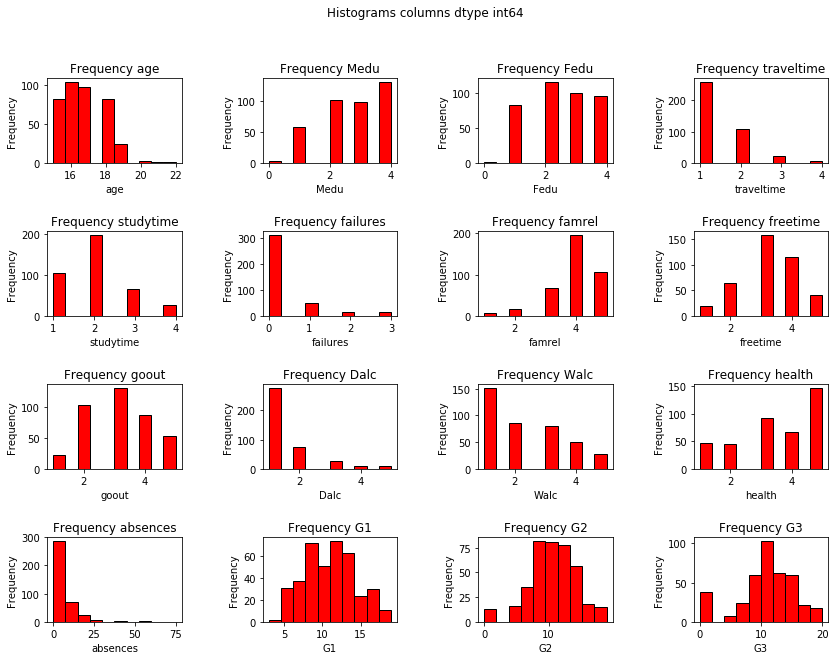

In [12]:
# histrogram, frequency columns dtype int64

fig, ax = plt.subplots(round(numPlots/4),round(numPlots/4), figsize=(14,10))
fig.subplots_adjust(wspace=0.6, hspace=0.8)
fig.suptitle('Histograms columns dtype int64')

n = 0
for i in range(round(numPlots/4)):
    for j in range(round(numPlots/4)):
        col = namesColInt64[n]; n +=1
        ax[i][j].hist(dataColumns_int64[col], color='r', edgecolor='black')
        ax[i][j].set_title('Frequency '+col)
        ax[i][j].set_xlabel(col)
        ax[i][j].set_ylabel('Frequency')

plt.show()



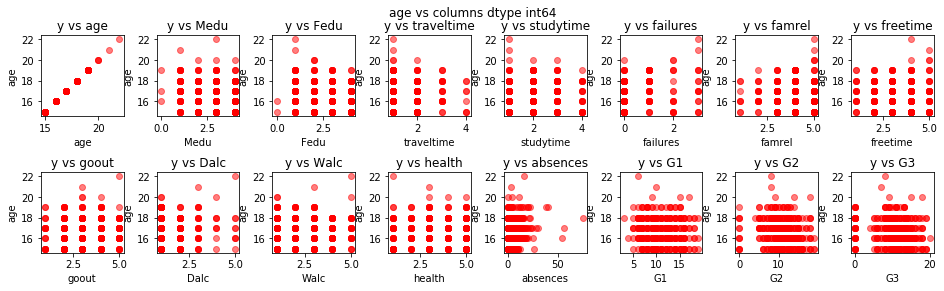

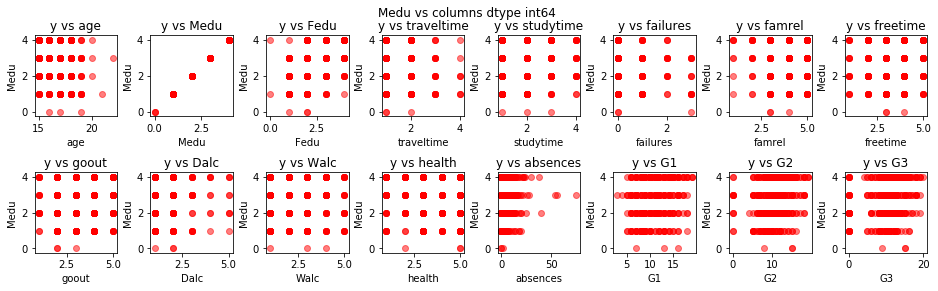

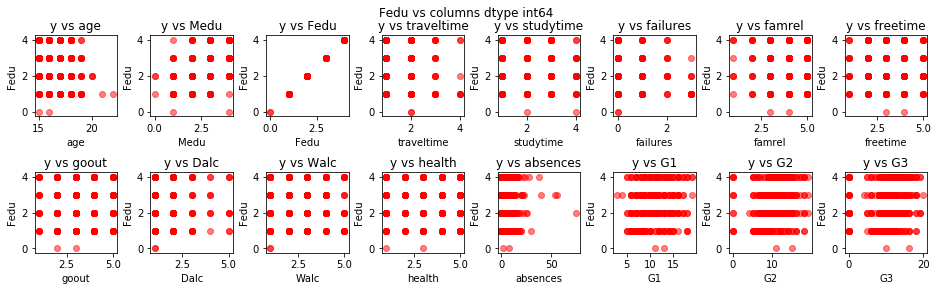

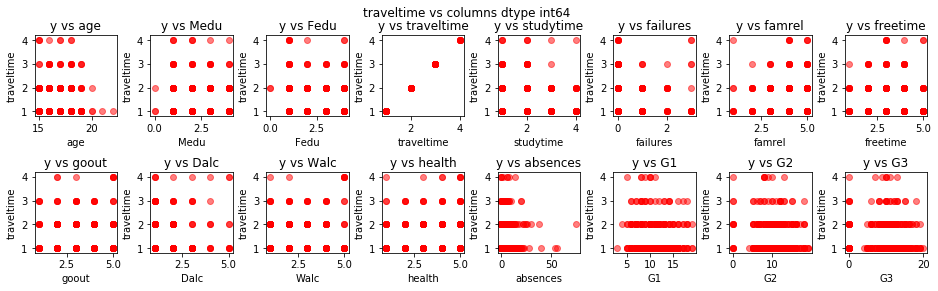

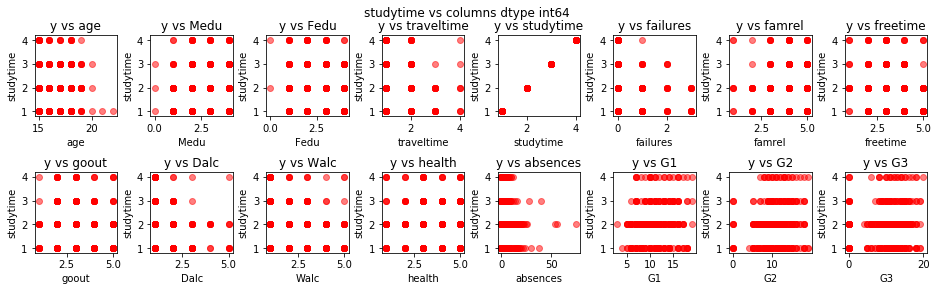

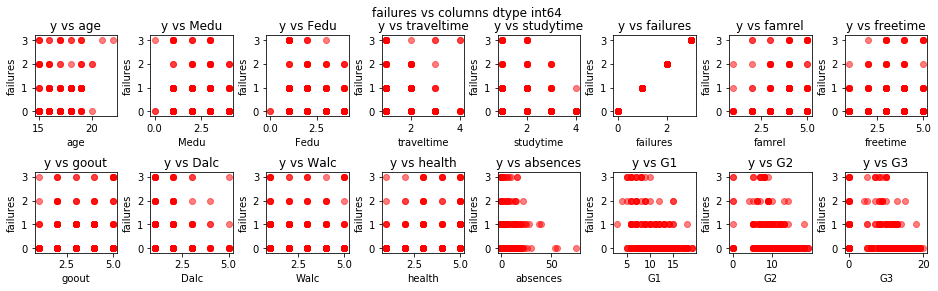

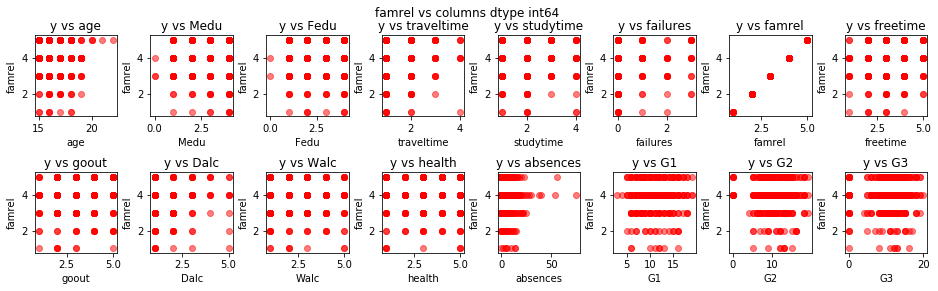

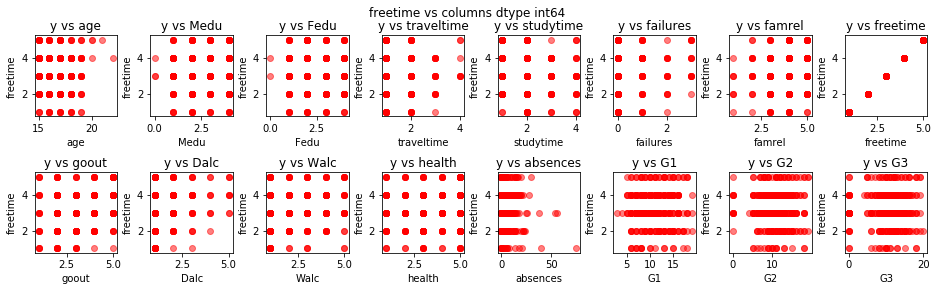

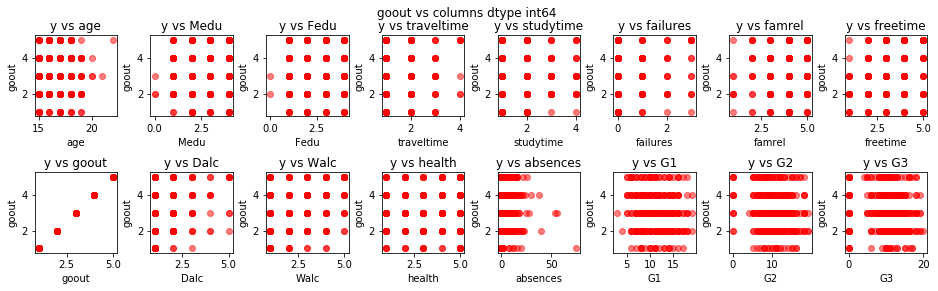

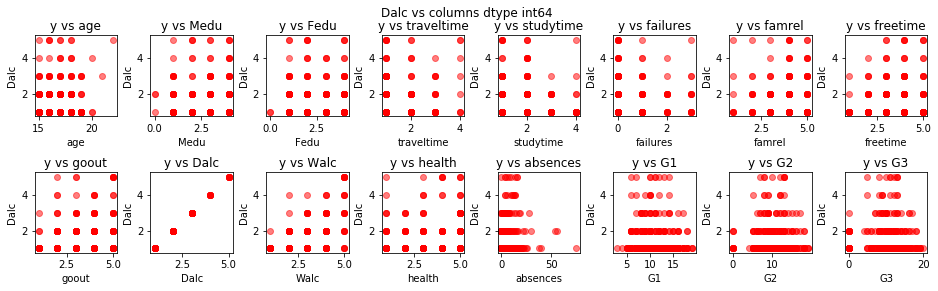

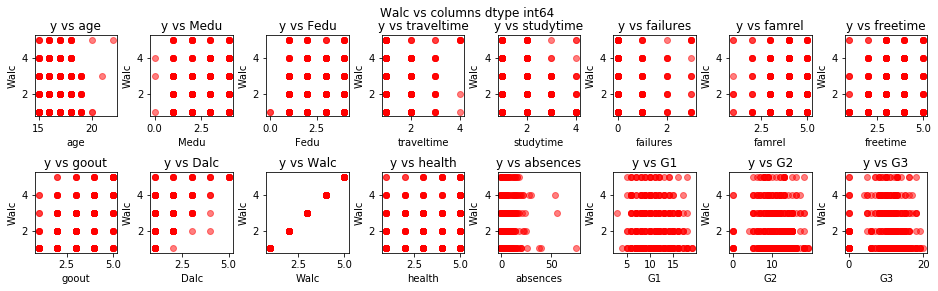

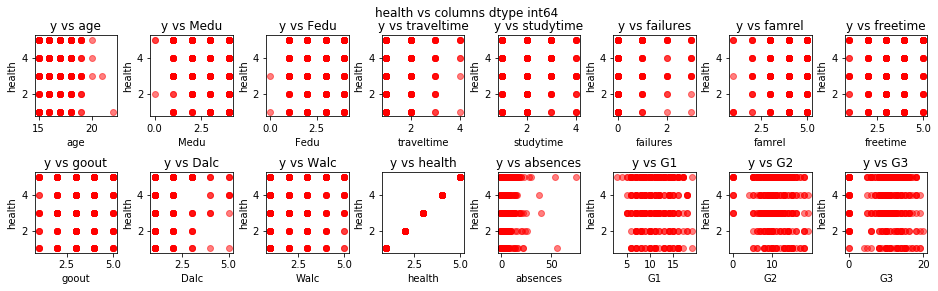

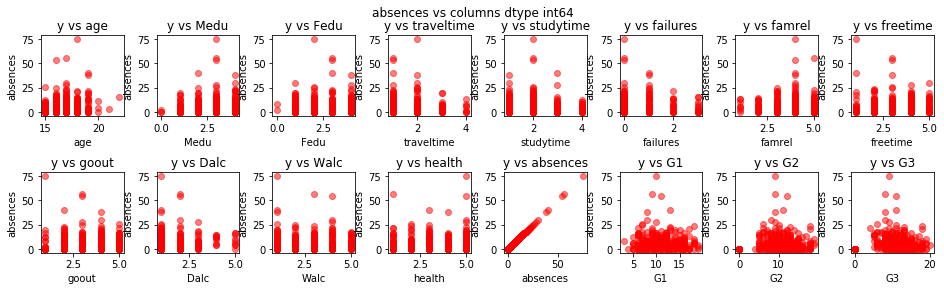

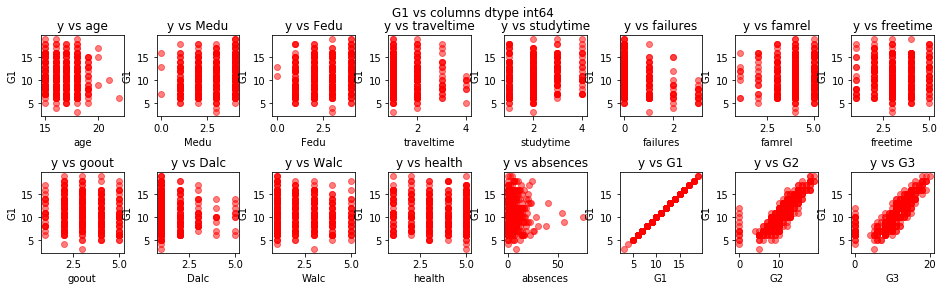

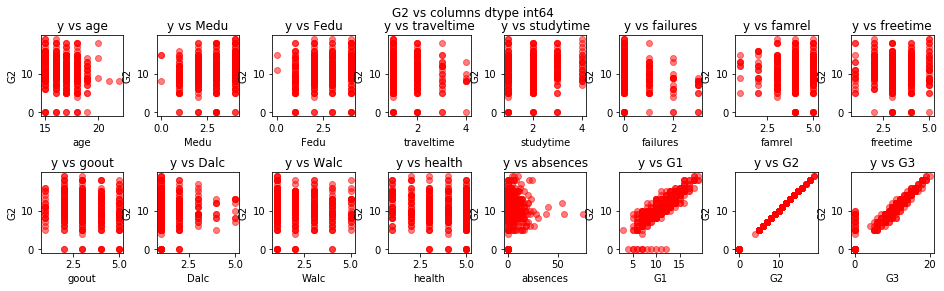

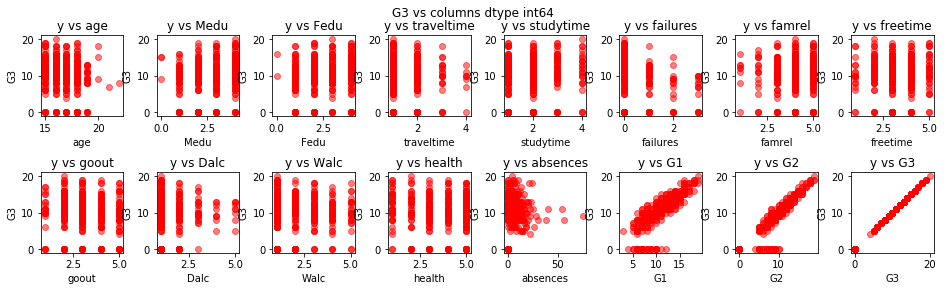

In [13]:
#Plots scatter columns dtype int64 vs columns dtype int64
#Plot scatter of all columns vs all columns with dtype int64
#This process can take a big time
#Each int64 columns's of data it is ploted here using plot kind scatter, each column it is ploted in two lines 
#of 8 columns in a total of 16 subplots to each column in axis y. Repare that are 16 int64 columns's.

k = 0 # control the column in axis y to each set of subplots.
#Create 16 subplots em format 2 lines and 8 columns
for m in range(2):
    for n in range(8):
        col = namesColInt64[k]; k +=1 # select the name of column to be ploted in axis y
        #create objet Figure and Axe with 2 lines and 8 columns.
        fig, ax = plt.subplots(2, 8, figsize=(16,4)) #Sharey=True, compartilhar eixo y.
        fig.subplots_adjust(wspace=0.4, hspace=0.7) # Some adjusts in space between subplots
        fig.suptitle(col+' vs columns dtype int64') # title figure

        # To each subplot create above it is fit with data. 
        #Esses laços são criados para preencher cada subplot criado acima, ou seja, preencher os 16 subplots
        # em formato de 2 linhas e 8 colunas.
        c = 0 #Control axis x to be ploted with axis y.
        for i in range(2):
            for j in range(8):
                linha = namesColInt64[c]; c +=1 #Control the axis x.
                ax[i][j].scatter(dataColumns_int64[linha], dataColumns_int64[col], color='r', alpha=0.5)
                ax[i][j].set_title('y vs '+linha)
                ax[i][j].set_xlabel(linha)
                ax[i][j].set_ylabel(col)

# Repare that it is created many Figure and Axes objets.
# It is create a object Figure and Axes to each column in axis y to be ploted.
# Each object Figure and Axes have much subplots that represent the other columns, represent in axis x, to be 
#ploted.


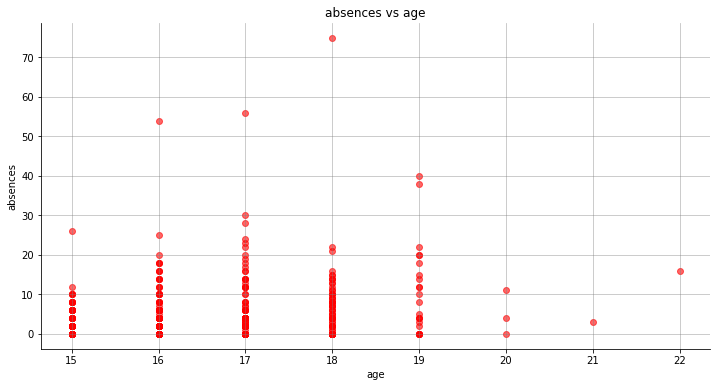

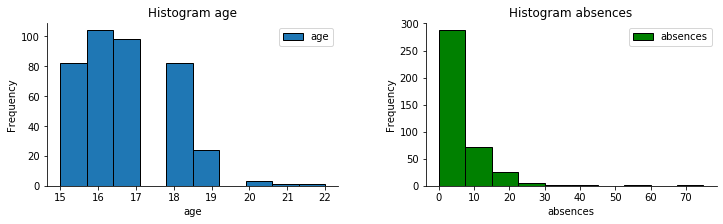

In [14]:
#Plot (scatter and histogram) to compare, more details about some axis/column

# select here the axis/columns
axiY = 'absences' # Axi Y
axiX = 'age' # Axi X



#----------------------------------- plot

fig, ax1 = plt.subplots(1,1, figsize=(12,6))

#Plot scatter
ax1.scatter(dataColumns_int64[axiX], dataColumns_int64[axiY], color='r', alpha=0.6)
ax1.set_title(axiY + ' vs ' + axiX)
ax1.set_xlabel(axiX)
ax1.set_ylabel(axiY)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(color='grey', alpha=0.5)
plt.show()

# Plots histograms
fig2, (ax21, ax22) = plt.subplots(1,2, figsize=(12,3))
fig2.subplots_adjust(wspace=0.3)

ax21.hist(dataColumns_int64[axiX], label=axiX, edgecolor='black') #density=True para frequência relativa
ax21.set_title('Histogram '+axiX)
ax21.set_xlabel(axiX)
ax21.set_ylabel('Frequency')
ax21.spines['top'].set_visible(False)
ax21.spines['right'].set_visible(False)
ax21.legend()

ax22.hist(dataColumns_int64[axiY], label=axiY,color='g', edgecolor='black') #density=True para frequência relativa
ax22.set_title('Histogram '+axiY)
ax22.set_xlabel(axiY)
ax22.set_ylabel('Frequency')
ax22.spines['top'].set_visible(False)
ax22.spines['right'].set_visible(False)
ax22.legend()

plt.show()

In [15]:
#selection columns dtype object

dataColumns_object = data.select_dtypes(include='object'); dataColumns_object

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [16]:
#selection names of columns dtype object
namesColObject = dataColumns_object.columns.values; namesColObject

array(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'], dtype=object)

In [17]:
# Example values and value_counts applying about columns school

print('Values column school: \n\n',data['school'].values); print(50*'-')
print('Value counts column school: \n\n',data['school'].value_counts())

Values column school: 

 ['GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP'
 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' 'GP' '

In [18]:
# print out columns dtype object with yours value_counts

for i in range(len(namesColObject)):
    col = namesColObject[i]
    print('value counts column '+col+': ')
    print(dataColumns_object[col].value_counts()); print(40*'-')
    

value counts column school: 
GP    349
MS     46
Name: school, dtype: int64
----------------------------------------
value counts column sex: 
F    208
M    187
Name: sex, dtype: int64
----------------------------------------
value counts column address: 
U    307
R     88
Name: address, dtype: int64
----------------------------------------
value counts column famsize: 
GT3    281
LE3    114
Name: famsize, dtype: int64
----------------------------------------
value counts column Pstatus: 
T    354
A     41
Name: Pstatus, dtype: int64
----------------------------------------
value counts column Mjob: 
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
----------------------------------------
value counts column Fjob: 
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
----------------------------------------
value counts column reason: 
course        145
home          109
reputati

6
3


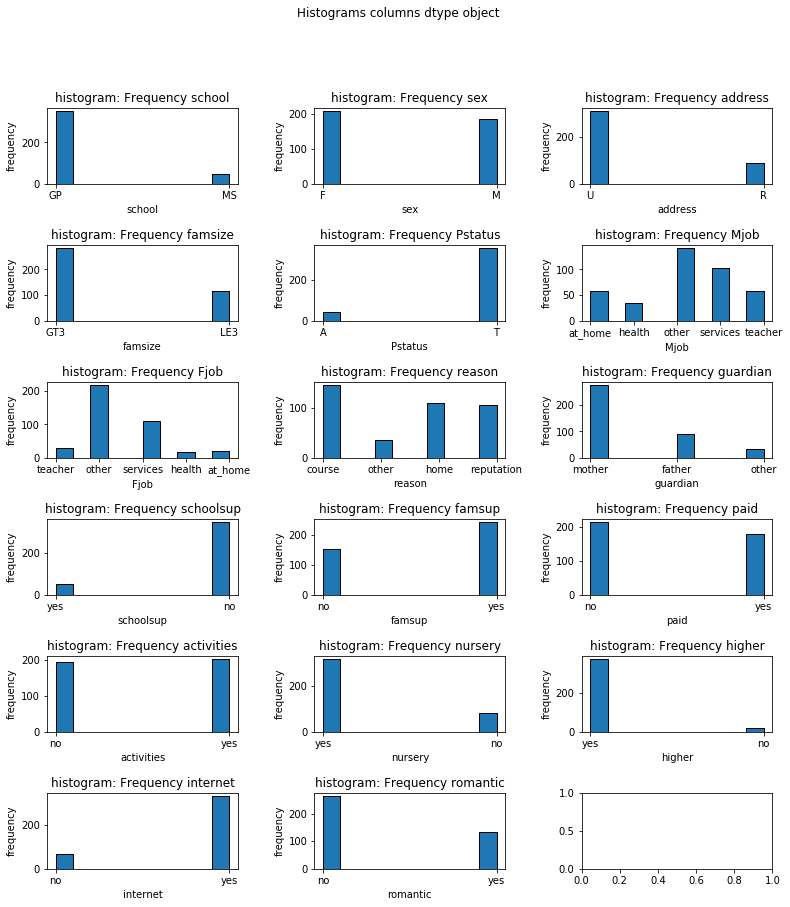

In [20]:

numColObject = len(namesColObject) # 17

fig, ax = plt.subplots(round(numColObject/3),round(numColObject/6), figsize=(13,14))
fig.subplots_adjust(hspace=0.8,wspace=0.4)
fig.suptitle('Histograms columns dtype object')

print(round(numColObject/3))
print(round(numColObject/6))

n = 0
for i in range(round(numColObject/3)):
    for j in range(round(numColObject/6)):
        col = namesColObject[n]; n +=1
        ax[i][j].hist(dataColumns_object[col], edgecolor='black')
        ax[i][j].set_title('histogram: Frequency '+col)
        ax[i][j].set_xlabel(col)
        ax[i][j].set_ylabel('frequency')
        
        if(n==17): # Pois existem somentes 17 plots e os laços vão até 18
            break
        
plt.show()



Change features

## Preprocessing data

In [99]:
# Preprocessing data dtype object using label encoder sklearn 

labEncod = preprocessing.LabelEncoder()

newColumns = pd.DataFrame()

for i in range(len(namesColObject)):
    for j in range(len(dataColumns_object)):
        newCol = labEncod.fit_transform(list(dataColumns_object[namesColObject[i]]))
        newColumns[namesColObject[i]] = newCol
    
newColumns # DataFrame with object dtype columns with new labels.

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,1,1,0,3,3,0,2,0,1,1,0,1,1,0,0
391,1,1,1,1,1,3,3,0,1,0,0,0,0,0,1,1,0
392,1,1,0,0,1,2,2,0,2,0,0,0,0,0,1,0,0
393,1,1,0,1,1,3,2,0,1,0,0,0,0,0,1,1,0


In [100]:
# Gerating correlation matriz to object dtype of dada

matrixCorrelation = newColumns.corr(); matrixCorrelation

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
school,1.000000,-0.012286,-0.279797,0.064866,0.045923,-0.056670,0.018974,-0.090010,0.011109,-0.139789,-0.164967,-0.017083,-0.116946,-0.089277,-0.024150,-0.133578,0.060700
sex,-0.012286,1.000000,-0.028504,0.089862,0.023443,0.191421,0.084957,-0.095867,-0.071343,-0.138271,-0.151623,-0.129126,0.099833,-0.008203,-0.151056,0.044113,-0.102023
address,-0.279797,-0.028504,1.000000,0.072472,-0.042572,0.108818,-0.001911,-0.047891,-0.044512,0.024712,0.023903,0.052800,-0.051360,0.059589,0.042854,0.216842,0.005257
famsize,0.064866,0.089862,0.072472,1.000000,-0.149612,0.071386,-0.084448,-0.019212,-0.002718,-0.028642,-0.112893,-0.013882,-0.000113,0.102088,-0.005806,0.000720,0.034395
Pstatus,0.045923,0.023443,-0.042572,-0.149612,1.000000,-0.054476,0.033892,-0.003553,-0.108715,-0.042238,0.019067,0.046435,0.097352,-0.090615,-0.040735,0.070074,-0.040451
Mjob,-0.056670,0.191421,0.108818,0.071386,-0.054476,1.000000,0.196758,0.022022,0.014787,-0.040958,0.050667,0.096566,0.098754,0.095848,0.097887,0.216969,-0.062999
Fjob,0.018974,0.084957,-0.001911,-0.084448,0.033892,0.196758,1.000000,-0.027688,-0.080511,-0.011657,-0.030159,-0.040435,0.032391,-0.030812,-0.045250,0.035777,-0.000583
reason,-0.090010,-0.095867,-0.047891,-0.019212,-0.003553,0.022022,-0.027688,1.000000,-0.000664,0.018516,0.090964,0.133559,0.115848,0.055659,0.058504,0.049916,0.018894
guardian,0.011109,-0.071343,-0.044512,-0.002718,-0.108715,0.014787,-0.080511,-0.000664,1.000000,-0.063545,-0.004516,0.043390,-0.023488,-0.080645,-0.020179,-0.059394,0.093945
schoolsup,-0.139789,-0.138271,0.024712,-0.028642,-0.042238,-0.040958,-0.011657,0.018516,-0.063545,1.000000,0.104681,-0.020753,0.046032,0.045967,0.054486,-0.009683,-0.080716


[]

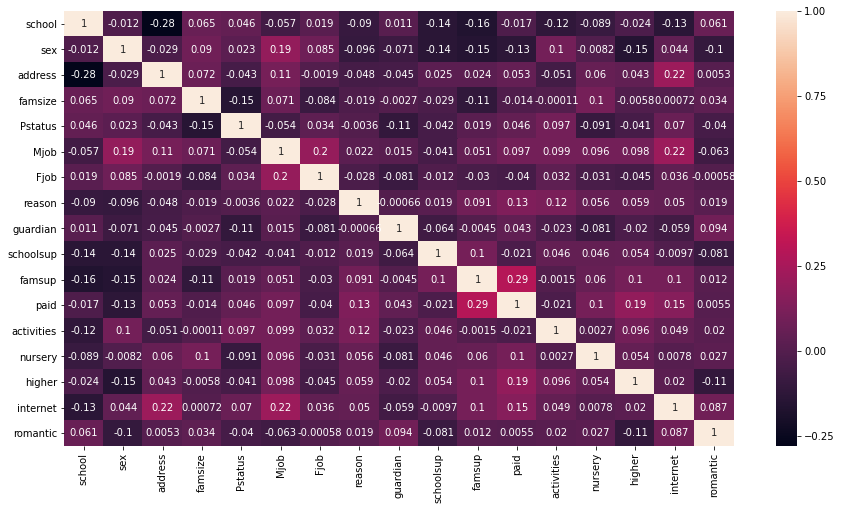

In [106]:
#Ploting heatMap of correlation Matriz above

fig, ax = plt.subplots(figsize=(15,8))
sn.heatmap(matrixCorrelation, annot=True)
plt.plot()



[]

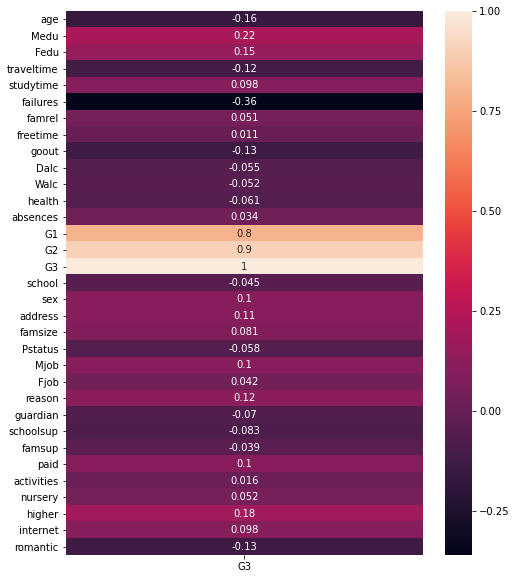

In [115]:

# concatenando dataFrames with int64 and object dtypes.
frames = [dataColumns_int64, newColumns]
#data = pd.concat(frames)
nData = pd.concat(frames, axis=1) # 1 indica que a concatenação é feita pelas colunas.

#nData.info()

matCorrelat = nData.corr()
fig, ax = plt.subplots(figsize=(8,10))

sn.heatmap(matCorrelat[['G3']], annot=True) # Plotando correlação de todas as features com apenas a variavel alvo.
plt.plot()

# Repare pela plotagem do heatmap que para as feature categoricas, a varivale alvo (G3, que é uma variavel numerica float),
# apresenta um espaço em branco, print out the matCorrelat, a matrix de correlação, pode perceber-se que 
# esses valores são nan.


## Applying model ML

In [387]:
#label and features

#x = nData[['Medu']]
#x = np.array(nData.drop([label,'G1','G2'], 1)) # features
x = np.array(nData.drop([label], 1)) # features
y = np.array(nData[label]) # label



In [399]:
# split data in train and test

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
# 10% of data to test and 90% to train


# Building model, accuracy

linear = linear_model.LinearRegression()

linear.fit(x_train, y_train)
accuracy = linear.score(x_test, y_test)

print('Accuracy: ',accuracy)


Accuracy:  0.9100600082743004


In [400]:
# Compare predicted, features, realValue

pred = []

predicted = linear.predict(x_test)

for i in range(len(x_test)):
    pred.append(['{0:.3f}'.format(predicted[i]), x_test[i], y_test[i]])

dfPred = pd.DataFrame(pred, columns=['Predicted', 'features', 'realValue']); dfPred

,Predicted,features,realValue
0,10.185,"[17, 2, 2, 4, 1, 0, 4, 4, 5, 5, 5, 4, 8, 11, 1...",10
1,7.147,"[18, 1, 1, 3, 1, 3, 5, 2, 5, 1, 5, 4, 6, 9, 8,...",10
2,7.334,"[19, 3, 3, 1, 2, 2, 4, 3, 5, 3, 3, 5, 15, 9, 9...",9
3,0.673,"[17, 3, 4, 3, 2, 0, 5, 4, 5, 2, 4, 5, 0, 10, 0...",0
4,13.946,"[18, 4, 4, 1, 2, 0, 3, 2, 4, 1, 4, 2, 4, 15, 1...",14
5,7.997,"[16, 2, 1, 1, 2, 0, 5, 3, 4, 1, 1, 2, 8, 8, 9,...",10
6,13.583,"[15, 3, 4, 1, 1, 0, 3, 4, 3, 1, 2, 4, 6, 14, 1...",13
7,9.019,"[18, 2, 3, 1, 3, 0, 4, 3, 3, 1, 2, 3, 4, 11, 1...",10
8,11.383,"[16, 3, 4, 1, 1, 0, 3, 2, 1, 1, 4, 5, 16, 12, ...",11
9,7.871,"[18, 3, 1, 1, 2, 0, 4, 3, 4, 1, 1, 1, 0, 7, 9,...",8


Fontes:

    [1]http://archive.ics.uci.edu/ml/datasets/Student+Performance#
    [2]https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b
    [3]https://pandas.pydata.org/pandas-docs/version/0.20/merging.html
    
    
    

Citations:

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.